Yes, Isolation Forest, One-Class SVM, LOF (Local Outlier Factor), and DBSCAN are all unsupervised machine learning algorithms
primarily used for outlier detection or clustering without the need for labeled data.

Which algorithms are commonly used for anomaly detection?

Statistical methods: Z-Score, Gaussian Distribution ,IQR
    
Machine learning methods: Isolation Forest, One-Class SVM, LOF (Local Outlier Factor).
                                                                
Deep learning methods: Autoencoders, Variational Autoencoders (VAEs), LSTM for time-series data.

# Global Outliers can be easily identified by DBSCAN and Isolation Forest 

# DBSCAN

DBSCAN groups points that are closely packed together, marking points as outliers if they are in low-density regions.

eps=0.3: Defines the radius around a point to search for neighboring points.

min_samples=5: The minimum number of neighbors (including the point itself) for a point to be considered a core point.
    
Points labeled as -1 are treated as outliers/noise.

In [20]:
from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_moons # to make non linear data
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [21]:
X,y = make_circles(n_samples=750,factor=0.3,noise=0.1)


In [22]:
X

array([[ 0.05105581,  0.27201195],
       [ 0.28416219,  0.89913218],
       [ 0.58131795,  0.6686393 ],
       ...,
       [ 1.0185457 , -0.055168  ],
       [ 1.03998209, -0.30013622],
       [ 0.07878568,  0.0037899 ]])

In [23]:
# Scale the data
X = StandardScaler().fit_transform(X)

In [24]:
# I will not use y as ywill be my ouput feature

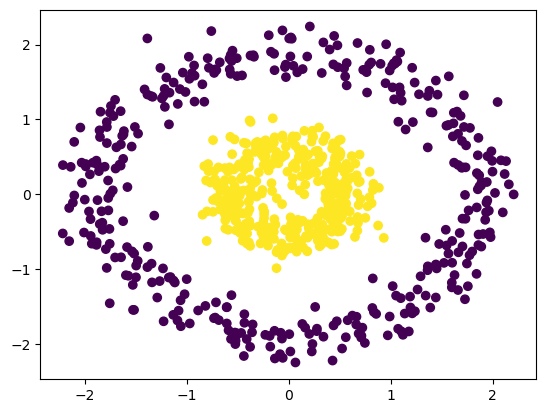

In [25]:
plt.scatter(X[:,0],X[:,1],c=y)

In [26]:
from sklearn.cluster import DBSCAN


In [34]:
# Apply DBSCAN with adjusted parameters
dbcan = DBSCAN(eps=0.2, min_samples=10)  # Adjust eps for finer control over clusters
labels=dbcan.fit_predict(X)

In [35]:
labels

array([ 0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  8,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0, -1,  0, -1, -1,  0,  0,  9,  0, -1,  0, -1,  0,
        0, -1, -1,  0,  3, -1,  0,  0,  0, 10, -1,  0, -1, -1,  0,  4, -1,
        4,  1,  0, 11,  0,  0,  8, -1,  1,  0,  0,  2, -1,  0,  0,  9,  0,
       10,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  7,  0,  0,  0,  0,
       -1,  3,  7, -1,  6,  3,  0,  5, -1,  0,  2,  0,  8,  4,  7, -1, -1,
        0,  3, 11,  0,  4,  0,  0,  0,  0,  0,  0, -1,  7,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, -1,  0, -1,  0, 11,  0,
       -1, -1, -1,  0,  5, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  5, -1,  0,  0,  0,  0,  0,  0, -1,
        3, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0, 10,  5,  0,  0,  0, -1,
        0, -1,  0,  6, -1,  0, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, 11,
       -1,  0,  0, -1,  0,  0,  0, -1,  6,  0,  0, -1, -1,  0, -1,  0,  0,
        1,  0,  1, -1,  0

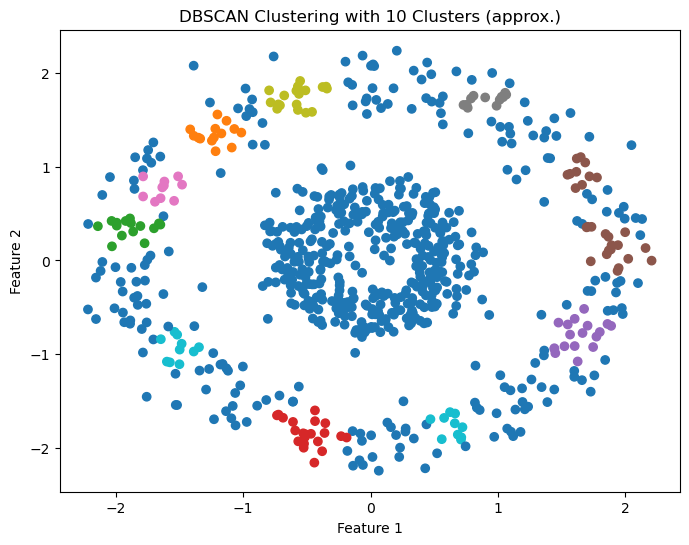

In [39]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10')  # Using tab10 for 10 colors
plt.title('DBSCAN Clustering with 10 Clusters (approx.)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [38]:
# Isolation Forest

# Local Outliers can be detemined by Local Outlier Factor  - unsupervised Learning

Local Outlier Factor (LOF) is an anomaly detection method used to identify outliers in data based on the density of the local neighborhood of each data point. It measures how isolated a point is with respect to its surrounding neighbors. A higher LOF score indicates that the point is likely an outlier.

Here’s how LOF works in anomaly detection:

Local Density: LOF calculates the density of the neighborhood of each data point by considering the distance to its k nearest neighbors.
Comparison: The density of a point is compared to the densities of its neighbors. If the point is in a region that is less dense than its neighbors, it is likely to be an outlier.
Anomaly Score: Each data point is assigned a score (LOF score), where a higher score suggests a higher likelihood of being an anomaly. A score around 1 indicates a normal point, while scores significantly greater than 1 suggest outliers.

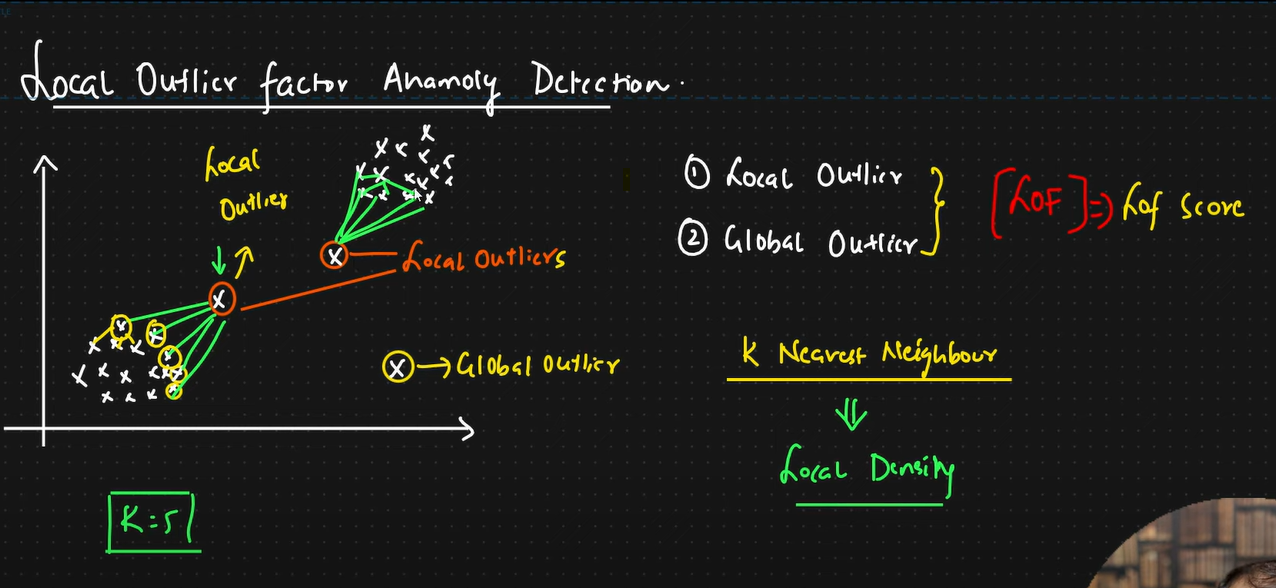

In [44]:
# Local Outlier Factor Anamoly Detection 
from sklearn.neighbors import LocalOutlierFactor

In [45]:
# Fit the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# LOF Model: The LocalOutlierFactor model is fit with n_neighbors=20 and contamination=0.05 (indicating that 5% of the data are expected to be outliers).
# Prediction: The model classifies points as either inliers (1) or outliers (-1).
# Visualization: We plot the inliers (blue) and outliers (red) for visualization.

In [46]:
# Identify outliers and inliers
outliers = X[y_pred == -1]
inliers = X[y_pred == 1]

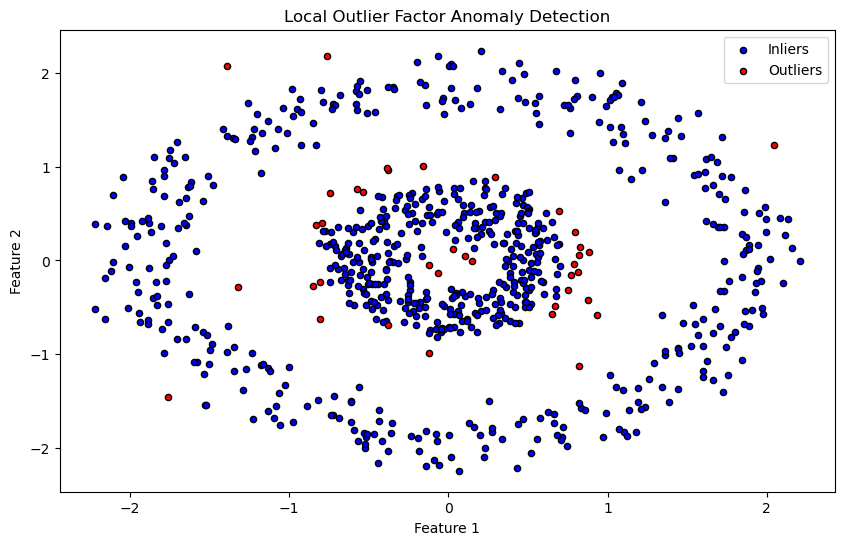

In [47]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', edgecolor='k', s=20, label="Inliers")
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k', s=20, label="Outliers")
plt.title("Local Outlier Factor Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.show()

In [ ]:
# Z Score

# Diff between the concept drift and data Drift

# Concept Drift:
The underlying relationship between features and the target changes, impacting the model's predictions.
Requires model retraining or adaptation to new patterns.

Example: A fraud detection model trained on past data may struggle if fraudsters change their tactics (e.g., using new types of scams),
making the relationship between transaction features and fraud different from what the model learned.

# Data Drift (Covariate Drift): 
The input feature distribution changes (shifts in mean value), but the relationship between the features and the target remains the same.
May affect model performance; monitoring is crucial.

Example: A housing price prediction model might see a change in the average income of buyers (input feature), 
but the relationship between income and house price stays the same.

# Alibi Detect Library

Alibi Detect is a Python library designed for detecting drift in machine learning models and data, often used to monitor whether the data distribution has changed over time. Drift detection is crucial in data science, especially for models deployed in production, as data distribution shifts (concept or data drift) can cause models to underperform.


# Hypothesis Testing for Drift Detection

Alibi Detect uses statistical hypothesis testing to determine if there is significant drift in the data. The basic idea is to compare two datasets:

Reference dataset: Data used to train the model (assumed to be in-distribution).
Test dataset: New data observed in production or over time.
The goal is to test if the test dataset comes from the same distribution as the reference dataset.

Steps:
Null Hypothesis (H0): The data distributions of the reference and test datasets are the same.
Alternative Hypothesis (H1): The data distributions are different, indicating drift.
Alibi Detect performs hypothesis tests on the two datasets to accept or reject the null hypothesis.

Example: 
# Kullback-Leibler (KL) Divergence for Drift Detection
One common test in Alibi Detect is based on KL Divergence:

KL divergence measures how one probability distribution diverges from a reference distribution.
If the divergence exceeds a certain threshold, the test rejects the null hypothesis (i.e., drift is detected).

# Chi-Square Test for Categorical Data

For categorical data, Alibi Detect uses the Chi-Square test to check if the observed frequencies in the test dataset differ from
the expected frequencies in the reference dataset.
A low p-value (typically < 0.05) from the Chi-Square test indicates that the observed and expected frequencies are significantly different,
suggesting drift.
    
Alibi Detect Implementation
In Alibi Detect, you can apply drift detection as follows:

python
Copy code

from alibi_detect.cd import ChiSquareDrift

# Initialize drift detector for categorical data
cd = ChiSquareDrift(X_ref, p_val=0.05)

# Perform drift detection
preds = cd.predict(X_test)

# Check if drift is detected
drift_detected = preds['data']['is_drift']

X_ref: Reference dataset.

X_test: Test dataset.

p_val: Significance level for hypothesis testing (e.g., 0.05).
                         
drift_detected: Boolean value indicating whether drift has been detected.

Key Concepts of the Chi-Square Test for Drift Detection:
Null Hypothesis (H₀): The two categorical distributions (reference and test datasets) are the same, meaning no drift has occurred.
Alternative Hypothesis (H₁): The two categorical distributions are different, indicating drift.
The test compares the observed frequencies in the test dataset to the expected frequencies from the reference dataset. If there is a significant difference between these frequencies, drift is detected.
Chi-Square Test Formula:
                                                                                                                                                         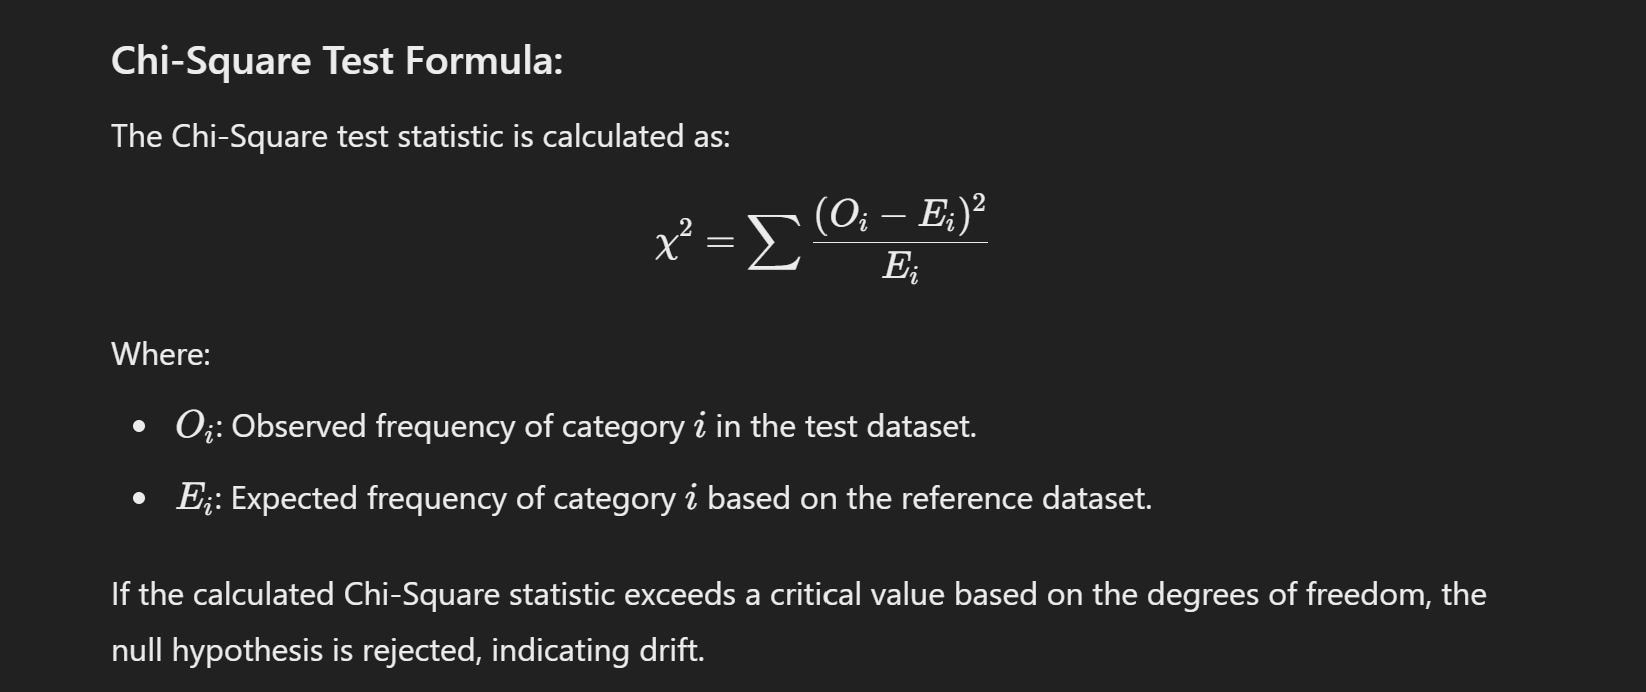                            
                                                                                                                                                                                     

The Kolmogorov-Smirnov (KS) test is a non-parametric statistical test used to compare the distributions of two datasets 
and is commonly applied for drift detection in data science. It is particularly useful when you want to detect drift in continuous data
by comparing whether two samples come from the same distribution.

# Key Concepts of the KS Test for Drift Detection:
Null Hypothesis (H₀): The two samples (reference and test datasets) come from the same distribution, meaning no drift has occurred.

# Alternative Hypothesis (H₁):
The two samples come from different distributions, indicating that drift has occurred.
The KS test compares the empirical cumulative distribution functions (ECDFs) of the two datasets. The maximum difference between the two ECDFs is used to calculate the test statistic.

# Kolmogorov-Smirnov Test in Alibi Detect
In Alibi Detect, the KS test is implemented for detecting drift in continuous data. The process follows these steps:

1. Reference and Test Data:
You have a reference dataset (X_ref) that is the baseline or original data distribution.
You have a test dataset (X_test) that represents new data you want to check for drift.
2. KS Test Statistic:
The KS test measures the largest distance between the ECDFs of the reference and test datasets. If this distance exceeds a critical threshold, the null hypothesis is rejected, indicating drift.
3. Implementation with Alibi Detect:
Alibi Detect provides the KSDrift class, which automatically applies the KS test for drift detection. Here's an example:

python
Copy code
from alibi_detect.cd import KSDrift

# Initialize the KSDrift detector
cd = KSDrift(X_ref, p_val=0.05)  # p_val: significance level, typically 0.05

# Predict drift on the new test data
preds = cd.predict(X_test)

# Check if drift is detected
drift_detected = preds['data']['is_drift']

# Print result
if drift_detected:
    print("Drift detected!")
else:
    print("No drift detected.")


Parameters:
X_ref: The reference dataset (baseline distribution).
p_val: Significance level (default is 0.05). If the p-value of the KS test is less than this, drift is detected.
X_test: The new dataset for which you want to detect drift.
    
Output:
preds['data']['is_drift']: Boolean value indicating if drift has been detected (True if drift is detected).
preds['data']['p_val']: The p-value of the KS test.
    
Example Walkthrough:
You have a dataset X_ref used for model training, which is considered the "normal" distribution.
                                                
You collect new data X_test over time in production.
                                                
By applying the KS test, you can detect if the distribution of the new data X_test significantly deviates from X_ref, indicating drift.
                                                
If the p-value is below 0.05 (or a custom threshold), drift is detected, signaling that the model may need retraining.

Pros of KS Test for Drift Detection:
Non-parametric: It makes no assumption about the underlying distribution of the data.
Sensitivity: It can detect subtle changes between distributions.
